<h1 align = 'center'>TORONTO BIKESHARE DATA</h>

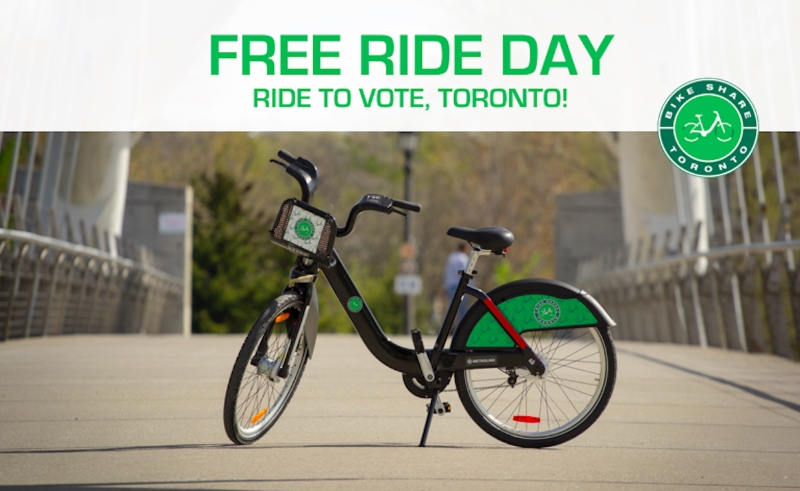

image source : https://bikesharetoronto.com/news/free-ride-day-on-october-22/

### 1. Problem Analysis

1. Find out what percentage of bikes are returned to its initial location?
2. How many bikeshare trips usually visit more than just start/end points, but visited some other points before the end of the day?

### 2. Data Requirements and Data Collection

Data from open data kaggle : https://www.kaggle.com/jackywang529/toronto-bikeshare-data

The Bike Share Toronto Ridership data contains anonymized trip data, including:
Trip start day and time, Trip end day and time, Trip duration, Trip start station, Trip end station, User type in 2018

format : csv

### 3. Data Cleaning

- Define Library

In [64]:
import pandas as pd
import json
import requests
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8

import cufflinks as cf

import folium
pyo.init_notebook_mode(connected = True)
cf.go_offline()

import numpy as np
from random import randint

import pycountry

import os

- Import Data

In [2]:
df1 = pd.read_csv('Bike Share Toronto Ridership_Q1 2018.csv')
df2 = pd.read_csv('Bike Share Toronto Ridership_Q2 2018.csv')
df3 = pd.read_csv('Bike Share Toronto Ridership_Q3 2018.csv')
df4 = pd.read_csv('Bike Share Toronto Ridership_Q4 2018.csv')

- concatenate Data

In [3]:
df2018 = df1.copy()
df2018 = df2018.append([df2, df3, df4], sort=False)
df2018.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


- Detection Missing Value

In [4]:
df2018.isna().sum()

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

- Change Data type to datetime

In [5]:
df2018['time'] = pd.to_datetime(df2018.trip_start_time)
df2018.index = df2018.time.dt.date
df2018.index.name = 'index'

In [6]:
df2018 = df2018.dropna(subset=['from_station_name','to_station_name'])
df = df2018.copy()
df.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00
2018-01-01,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00
2018-01-01,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00
2018-01-01,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00
2018-01-01,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00


### 4. Exploratory Data Analysis & Presentation

1. Find out what percentage of bikes are returned to its initial location?

Quartal 1


In [7]:
df1_ = df1.copy()
df1_['time'] = pd.to_datetime(df1_.trip_start_time)
df1_.index = df1_.time.dt.date
df1_.index.name = 'index'
df1_ = df1_.dropna(subset=['from_station_name','to_station_name'])

In [8]:
station_1 = list(set(list(df1_.from_station_name.values) + list(df1_.to_station_name.values)))
date_1 = df1_.index.unique().values

In [9]:
route_1 = df1_.copy()
route_1 = route_1[['from_station_name', 'to_station_name']]

In [10]:
twoway_1 = route_1.copy()
twoway_1 = twoway_1[twoway_1.from_station_name == twoway_1.to_station_name]
oneway_1 = route_1.copy()
oneway_1 = oneway_1[oneway_1.from_station_name != oneway_1.to_station_name]

In [11]:
Q1 = 2299/(176260+2299)*100
Q1

1.2875296120609994

Quartal 2

In [12]:
df2_ = df2.copy()
df2_['time'] = pd.to_datetime(df2_.trip_start_time)
df2_.index = df2_.time.dt.date
df2_.index.name = 'index'
df2_ = df2_.dropna(subset=['from_station_name','to_station_name'])

In [13]:
station_2 = list(set(list(df2_.from_station_name.values) + list(df2_.to_station_name.values)))
date_2 = df2_.index.unique().values

In [14]:
route_2 = df2_.copy()
route_2 = route_2[['from_station_name', 'to_station_name']]

In [15]:
twoway_2 = route_2.copy()
twoway_2 = twoway_2[twoway_2.from_station_name == twoway_2.to_station_name]
oneway_2 = route_2.copy()
oneway_2 = oneway_2[oneway_2.from_station_name != oneway_2.to_station_name]

In [16]:
Q2 = 19879/(19879+538491)*100
Q2

3.560184107312356

Quartal 3

In [17]:
df3_ = df3.copy()
df3_['time'] = pd.to_datetime(df3_.trip_start_time)
df3_.index = df3_.time.dt.date
df3_.index.name = 'index'
df3_ = df3_.dropna(subset=['from_station_name','to_station_name'])

In [18]:
station_3 = list(set(list(df3_.from_station_name.values) + list(df3_.to_station_name.values)))
date_3 = df3_.index.unique().values

In [19]:
route_3 = df3_.copy()
route_3 = route_3[['from_station_name', 'to_station_name']]

In [20]:
twoway_3 = route_3.copy()
twoway_3 = twoway_3[twoway_3.from_station_name == twoway_3.to_station_name]
oneway_3 = route_3.copy()
oneway_3 = oneway_3[oneway_3.from_station_name != oneway_3.to_station_name]

In [21]:
Q3 = 29886/(29886+792650)*100
Q3

3.633397200851999

Quartal 4

In [22]:
df4_ = df4.copy()
df4_['time'] = pd.to_datetime(df4_.trip_start_time)
df4_.index = df4_.time.dt.date
df4_.index.name = 'index'
df4_ = df4_.dropna(subset=['from_station_name','to_station_name'])

In [23]:
station_4 = list(set(list(df4_.from_station_name.values) + list(df4_.to_station_name.values)))
date_4 = df4_.index.unique().values

In [24]:
route_4 = df4_.copy()
route_4 = route_4[['from_station_name', 'to_station_name']]

In [25]:
twoway_4 = route_4.copy()
twoway_4 = twoway_4[twoway_4.from_station_name == twoway_4.to_station_name]
oneway_4 = route_4.copy()
oneway_4 = oneway_4[oneway_4.from_station_name != oneway_4.to_station_name]

In [26]:
Q4 = 5203/(358287+5203)*100
Q4

1.4314011389584307

In [27]:
 q1_q2 = pd.DataFrame([Q1,Q2,Q3,Q4],['q1','q2','q3','q4'])

In [28]:
 q1_q2.columns = ['% bikes are returned to initial location']

In [29]:
[178559,558370,822536,363490]

[178559, 558370, 822536, 363490]

In [30]:
 q1_q2['Total trip'] = [178559,558370,822536,363490]

In [31]:
q1_q2

,% bikes are returned to initial location,Total trip
q1,1.287530,178559
q2,3.560184,558370
q3,3.633397,822536
q4,1.431401,363490


In [51]:
q1_q2_ = q1_q2.copy().reset_index()

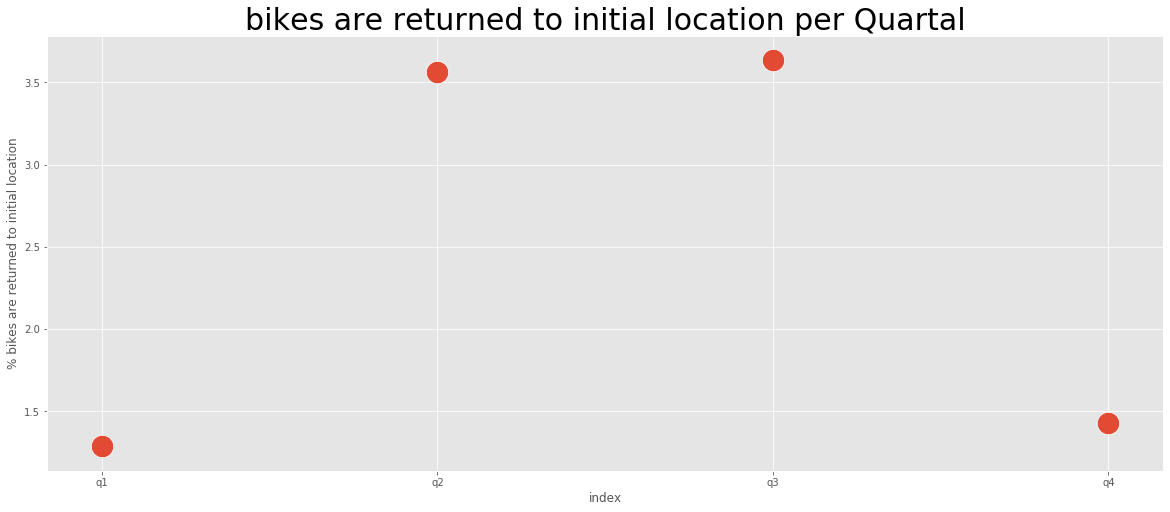

In [69]:
sns.scatterplot(data= q1_q2_, x ='index', y = '% bikes are returned to initial location', s = 500)
plt.title('bikes are returned to initial location per Quartal', fontsize = 30)
plt.show()

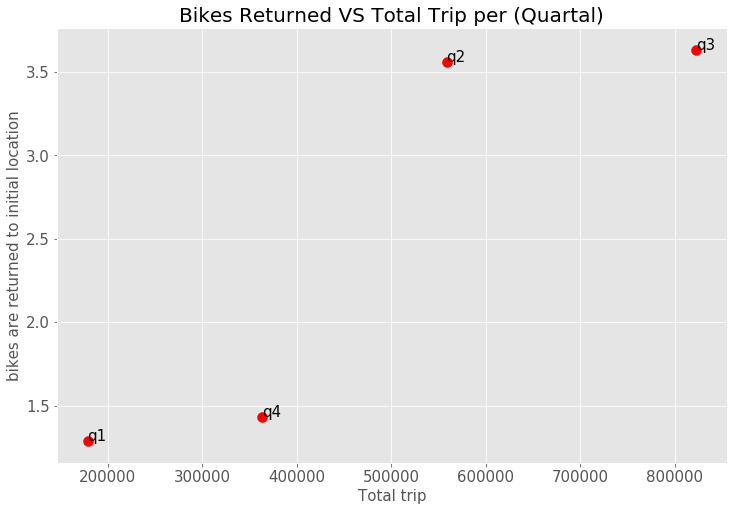

In [66]:
q1_q2.plot.scatter(x = "Total trip", y = "% bikes are returned to initial location", figsize = (12,8), s = 100, fontsize = 15, c = 'red')
for i in q1_q2.index:
    plt.annotate(i, xy = (q1_q2.loc[i,"Total trip"]+0.002, q1_q2.loc[i, "% bikes are returned to initial location"]+0.002), size = 15)
plt.xlabel("Total trip", fontsize = 15)
plt.ylabel("bikes are returned to initial location", fontsize = 15)
plt.title("Bikes Returned VS Total Trip per (Quartal)", fontsize = 20)
plt.show()

Annual (2018)

In [33]:
station = list(set(list(df.from_station_name.values) + list(df.to_station_name.values)))
date = df.index.unique().values

In [34]:
route = df.copy()
route = route[['from_station_name', 'to_station_name']]

In [35]:
twoway = route.copy()
twoway = twoway[twoway.from_station_name == twoway.to_station_name]
oneway = route.copy()
oneway = oneway[oneway.from_station_name != oneway.to_station_name]

In [36]:
twoway_map = twoway.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('10 Stations with the highest number of two-way traveller')
twoway_map[:100]

10 Stations with the highest number of two-way traveller


,to_station_name
from_station_name,
Bay St / Queens Quay W (Ferry Terminal),3515
Humber Bay Shores Park West,2162
York St / Queens Quay W,1969
Ontario Place Blvd / Lakeshore Blvd W,1746
Tommy Thompson Park (Leslie Street Spit),1742
...,...
Charles St W / Balmuto St - SMART,135
Elizabeth St / Edward St (Bus Terminal),132
The Royal Ontario Museum (Bloor St Entrance),130


In [37]:
twoway_map

,to_station_name
from_station_name,
Bay St / Queens Quay W (Ferry Terminal),3515
Humber Bay Shores Park West,2162
York St / Queens Quay W,1969
Ontario Place Blvd / Lakeshore Blvd W,1746
Tommy Thompson Park (Leslie Street Spit),1742
...,...
Yonge St / Dundas Sq,6
College Park- Gerrard Entrance,6
161 Bleecker St (South of Wellesley),6


In [38]:
twoway.count()

from_station_name    57267
to_station_name      57267
dtype: int64

In [39]:
oneway.count()

from_station_name    1865688
to_station_name      1865688
dtype: int64

In [40]:
1865688+57267

1922955

In [41]:
57267/1922955*100

2.978072809816142

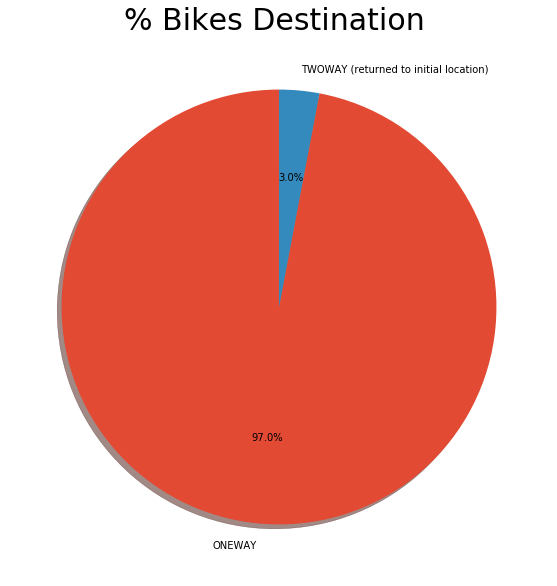

In [87]:
labels = 'ONEWAY','TWOWAY (returned to initial location)'
a = 100 - (57267/1922955*100)
b = 57267/1922955*100
sizes = [a,b]


fig = plt.figure(figsize =(10, 10)) 
plt.pie(sizes, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90) 

plt.title('% Bikes Destination ', size = 30)
plt.show()

In [71]:
# get the stations information from https://tor.publicbikesystem.net
req = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')
stations = json.loads(req.content)['data']['stations']
stations = pd.DataFrame(stations)[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'float64',
})

stations.head()

,station_id,name,lat,lon
0,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001.0,Lower Jarvis St / The Esplanade,43.647830,-79.370698
2,7002.0,St. George St / Bloor St W,43.667333,-79.399429
3,7003.0,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004.0,University Ave / Elm St,43.656518,-79.389099


In [72]:
twoway_map.reset_index(inplace = True)

In [73]:
twoway_map.rename(columns = {'from_station_name':'name'}, inplace = True)

In [74]:
mapping = twoway_map.merge(stations, how = 'inner', on = 'name')

In [75]:
mapping

,name,to_station_name,station_id,lat,lon
0,Bay St / Queens Quay W (Ferry Terminal),3515,7016.0,43.640823,-79.376265
1,Humber Bay Shores Park West,2162,7288.0,43.622443,-79.480284
2,York St / Queens Quay W,1969,7076.0,43.640132,-79.380464
3,Tommy Thompson Park (Leslie Street Spit),1742,7354.0,43.651737,-79.323250
4,HTO Park (Queens Quay W),1606,7175.0,43.637960,-79.387502
...,...,...,...,...,...
321,Yonge St / Dundas Sq,6,7391.0,43.655766,-79.380200
322,College Park- Gerrard Entrance,6,7389.0,43.658938,-79.383518
323,161 Bleecker St (South of Wellesley),6,7071.0,43.666233,-79.373327
324,D'Arcy St. /McCaul St. SMART,5,7386.0,43.655227,-79.392010


In [76]:
map = folium.Map(location=[-79.4621,43.7180], zoom_start = 4.49, tiles = 'openstreetmap')

for lat,long,value,name in zip(mapping['lat'],mapping['lon'],mapping['to_station_name'],mapping['name']):
    folium.CircleMarker([lat,long],radius=value*0.01,popup=('<strong>Station Name</strong>: '+ str(name).capitalize()+'<br>''<strong>Total Bikeshare Back To station</strong>: ' + str(value)+'<br>'),color='red', fill_color = 'red',fill_opacity=0.3).add_to(map)

map

2. How many bikeshare trips usually visit more than just start/end points, but visited some other points before the end of the day?

In [77]:
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'])
df['trip_stop_time'] = pd.to_datetime(df['trip_stop_time'])

In [78]:
df_sameday = df[(df['trip_start_time'].dt.date) == (df['trip_stop_time'].dt.date)]

In [79]:
df_sameday

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00
2018-01-01,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00
2018-01-01,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00
2018-01-01,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00
2018-01-01,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,4581271,258,7152,2018-12-31 23:27:00,Ossington Ave / Bloor St W,2018-12-31 23:32:00,7153,Bloor St W / Christie St,Annual Member,2018-12-31 23:27:00
2018-12-31,4581272,173,7006,2018-12-31 23:35:00,Bay St / College St (East Side),2018-12-31 23:37:00,7012,Elizabeth St / Edward St (Bus Terminal),Annual Member,2018-12-31 23:35:00
2018-12-31,4581273,379,7088,2018-12-31 23:43:00,Danforth Ave / Coxwell Ave,2018-12-31 23:49:00,7091,Donlands Station,Annual Member,2018-12-31 23:43:00


In [80]:
df_sameday[df_sameday.duplicated(subset=['from_station_name','to_station_name'],keep ='first')]

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383722,373,7007,2018-01-01 11:22:00,College St / Huron St,2018-01-01 11:28:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-01 11:22:00
2018-01-01,2383741,3994,7075,2018-01-01 11:44:00,Queens Quay W / Dan Leckie Way,2018-01-01 12:50:00,7248,Baldwin Ave / Spadina Ave - SMART,Casual Member,2018-01-01 11:44:00
2018-01-01,2383762,1062,7100,2018-01-01 12:00:00,Dundas St E / Regent Park Blvd,2018-01-01 12:18:00,7016,Bay St / Queens Quay W (Ferry Terminal),Annual Member,2018-01-01 12:00:00
2018-01-01,2383860,566,7211,2018-01-01 14:32:00,Fort York Blvd / Garrison Rd,2018-01-01 14:42:00,7259,Lower Spadina Ave / Lakeshore Blvd,Annual Member,2018-01-01 14:32:00
2018-01-01,2383865,1293,7014,2018-01-01 14:57:00,Sherbourne St / Carlton St (Allan Gardens),2018-01-01 15:19:00,7016,Bay St / Queens Quay W (Ferry Terminal),Casual Member,2018-01-01 14:57:00
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,4581271,258,7152,2018-12-31 23:27:00,Ossington Ave / Bloor St W,2018-12-31 23:32:00,7153,Bloor St W / Christie St,Annual Member,2018-12-31 23:27:00
2018-12-31,4581272,173,7006,2018-12-31 23:35:00,Bay St / College St (East Side),2018-12-31 23:37:00,7012,Elizabeth St / Edward St (Bus Terminal),Annual Member,2018-12-31 23:35:00
2018-12-31,4581273,379,7088,2018-12-31 23:43:00,Danforth Ave / Coxwell Ave,2018-12-31 23:49:00,7091,Donlands Station,Annual Member,2018-12-31 23:43:00


## College St / Huron St -------------------------> Bay St / College St (West Side) - SMART

In [81]:
df_7100_7016 = df[(df['from_station_name'] == 'College St / Huron St') & (df['to_station_name'] == 'Bay St / College St (West Side) - SMART') ]
df_7100_7016

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383721,409,7007,2018-01-01 11:21:00,College St / Huron St,2018-01-01 11:28:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-01 11:21:00
2018-01-01,2383722,373,7007,2018-01-01 11:22:00,College St / Huron St,2018-01-01 11:28:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-01 11:22:00
2018-01-05,2389391,389,7007,2018-01-05 21:25:00,College St / Huron St,2018-01-05 21:32:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-05 21:25:00
2018-01-07,2390495,295,7007,2018-01-07 19:50:00,College St / Huron St,2018-01-07 19:55:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-07 19:50:00
2018-01-09,2393735,326,7007,2018-01-09 18:04:00,College St / Huron St,2018-01-09 18:09:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-09 18:04:00
...,...,...,...,...,...,...,...,...,...,...
2018-12-19,4552794,359,7007,2018-12-19 11:56:00,College St / Huron St,2018-12-19 12:02:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-12-19 11:56:00
2018-12-19,4555431,345,7007,2018-12-19 20:49:00,College St / Huron St,2018-12-19 20:55:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-12-19 20:49:00
2018-12-20,4556340,309,7007,2018-12-20 08:17:00,College St / Huron St,2018-12-20 08:22:00,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-12-20 08:17:00


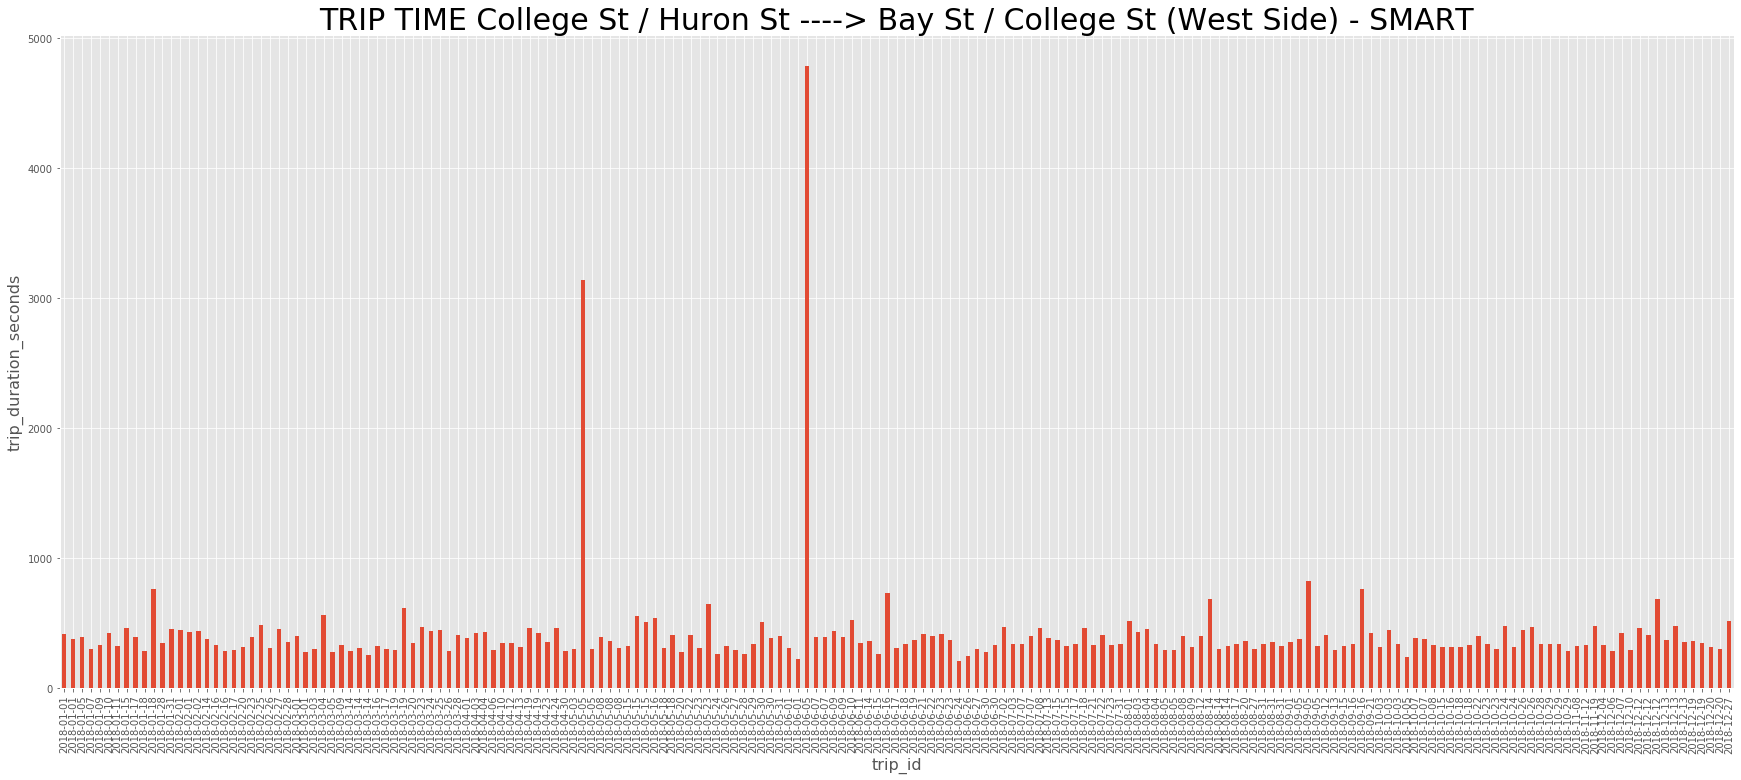

In [82]:
df_7100_7016.trip_duration_seconds.plot(kind='bar',figsize = (30,12))
plt.title('TRIP TIME College St / Huron St ----> Bay St / College St (West Side) - SMART', size = 30)
plt.ylabel('trip_duration_seconds', size = 16)
plt.xlabel('trip_id', size = 16)
plt.show()

In [83]:
df_7100_7016.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,1.870000e+02,187.000000,187.0,187.0
mean,3.292176e+06,413.802139,7007.0,7235.0
std,7.194031e+05,392.418307,0.0,0.0
min,2.383721e+06,202.000000,7007.0,7235.0
25%,2.614314e+06,309.500000,7007.0,7235.0
50%,3.113069e+06,347.000000,7007.0,7235.0
75%,3.922922e+06,421.500000,7007.0,7235.0
max,4.573000e+06,4784.000000,7007.0,7235.0


## Bay St / College St (West Side) - SMART ----> Bay St / Albert St

In [84]:
df_7184_7191 = df[(df['from_station_id'] == 7235) & (df['to_station_id'] == 7021) ]
df_7184_7191

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00
2018-01-09,2393260,281,7235,2018-01-09 16:07:00,Bay St / College St (West Side) - SMART,2018-01-09 16:12:00,7021,Bay St / Albert St,Annual Member,2018-01-09 16:07:00
2018-01-10,2394644,343,7235,2018-01-10 08:39:00,Bay St / College St (West Side) - SMART,2018-01-10 08:44:00,7021,Bay St / Albert St,Annual Member,2018-01-10 08:39:00
2018-01-10,2395257,274,7235,2018-01-10 11:58:00,Bay St / College St (West Side) - SMART,2018-01-10 12:02:00,7021,Bay St / Albert St,Annual Member,2018-01-10 11:58:00
2018-01-19,2414109,193,7235,2018-01-19 13:37:00,Bay St / College St (West Side) - SMART,2018-01-19 13:41:00,7021,Bay St / Albert St,Annual Member,2018-01-19 13:37:00
...,...,...,...,...,...,...,...,...,...,...
2018-12-13,4531469,235,7235,2018-12-13 17:58:00,Bay St / College St (West Side) - SMART,2018-12-13 18:02:00,7021,Bay St / Albert St,Annual Member,2018-12-13 17:58:00
2018-12-18,4547299,270,7235,2018-12-18 08:59:00,Bay St / College St (West Side) - SMART,2018-12-18 09:03:00,7021,Bay St / Albert St,Annual Member,2018-12-18 08:59:00
2018-12-18,4548972,198,7235,2018-12-18 16:03:00,Bay St / College St (West Side) - SMART,2018-12-18 16:06:00,7021,Bay St / Albert St,Annual Member,2018-12-18 16:03:00


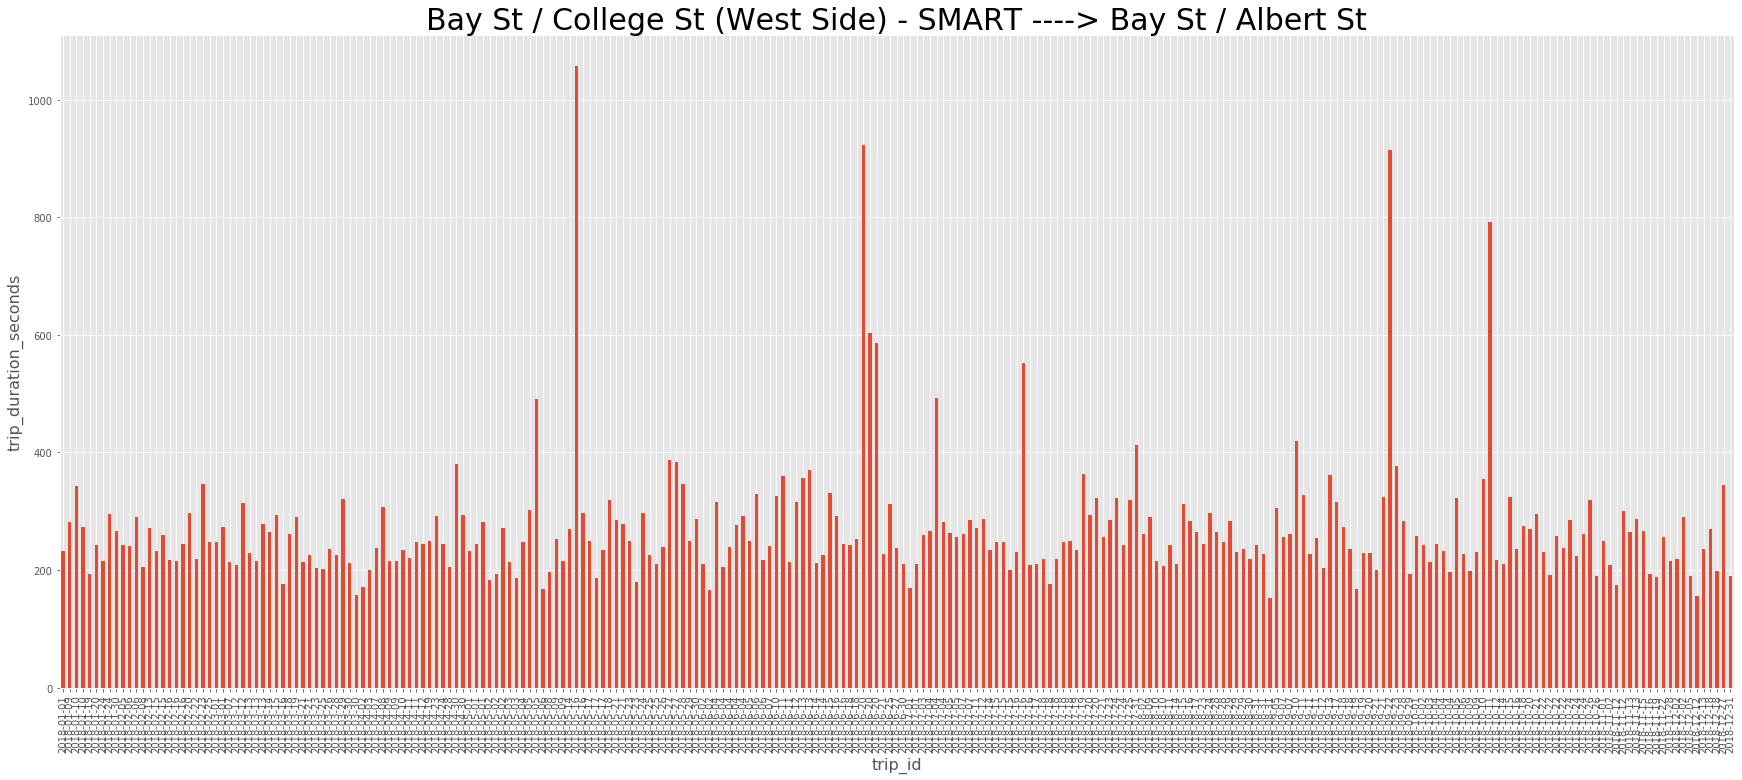

In [85]:
df_7184_7191.trip_duration_seconds.plot(kind='bar',figsize = (30,12))
plt.title('Bay St / College St (West Side) - SMART ----> Bay St / Albert St', size = 30)
plt.ylabel('trip_duration_seconds', size = 16)
plt.xlabel('trip_id', size = 16)
plt.show()

In [86]:
df_7184_7191.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,2.510000e+02,251.000000,251.0,251.0
mean,3.329598e+06,269.804781,7235.0,7021.0
std,6.763026e+05,105.864469,0.0,0.0
min,2.383650e+06,152.000000,7235.0,7021.0
25%,2.723616e+06,216.500000,7235.0,7021.0
50%,3.212930e+06,248.000000,7235.0,7021.0
75%,3.971662e+06,290.000000,7235.0,7021.0
max,4.580065e+06,1057.000000,7235.0,7021.0
